In [43]:
from library import *

https://www.kaggle.com/datasets/START-UMD/gtd

https://www.start.umd.edu/sites/default/files/2024-10/Codebook.pdf


In [66]:
def open_load_df():
    df = pd.read_csv('../data/globalterrorismdb_0718dist.csv')
    df = df.copy()
    return df

df = open_load_df()

C:\Users\hungh\AppData\Local\Temp\ipykernel_4084\2397569251.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/globalterrorismdb_0718dist.csv')


In [67]:
df.sample(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
136985,201408250028,2014,8,25,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""Afghanistan: Two Pro-Government Fighters, 6 I...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
98894,201011020023,2010,11,2,NaN,0,NaN,95,Iraq,10,...,This was one of 15 related attacks (cf. 201011...,"Guardian, ""Scores Die in Bomb Attacks on Baghd...","McClatchy Newspapers, Mohammed Al Dulaimy, ""Ro...","Xinhua News Agency, �Al-Qaida Claims Responsib...",ISVG,0,0,0,0,"201011020023, 201011020020, 201011020021, 2010..."
147008,201504190052,2015,4,19,NaN,0,NaN,60,Egypt,10,...,NaN,"""Hosted Product: Sinai Summary 31 March - 2 Ma...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
24625,198503220012,1985,3,22,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,"198503220011, 198503220012"
174840,201705160055,2017,5,16,NaN,1,NaN,222,Venezuela,3,...,NaN,"""Relatives of murdered claim that he was not a...","""Venezuela: �Fascist� thugs blamed for leftwin...","""Venezuela: �Fascist� thugs blamed for leftwin...",START Primary Collection,-9,-9,0,-9,NaN


In [68]:
def info_dtypes(df):

    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()

    num_cols_count = df[num_cols].dtypes.count()
    cat_cols_count = df[cat_cols].dtypes.count()

    print(f"Dtypes: \n{df.dtypes.value_counts()}\n")
    print(f"Numerical Columns: {num_cols_count}")
    print(f"Categorical Columns: {cat_cols_count}")

    return num_cols, cat_cols

num_cols, cat_cols = info_dtypes(df)

Dtypes: 
object     58
float64    55
int64      22
Name: count, dtype: int64

Numerical Columns: 77
Categorical Columns: 58


In [69]:
def summarize_columns(df, num_cols, cat_cols):
    print(f"{num_cols}\n")
    print(cat_cols)

summarize_columns(df, num_cols, cat_cols)

['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country', 'region', 'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype2', 'attacktype3', 'targtype1', 'targsubtype1', 'natlty1', 'targtype2', 'targsubtype2', 'natlty2', 'targtype3', 'targsubtype3', 'natlty3', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claim2', 'claimmode2', 'claim3', 'claimmode3', 'compclaim', 'weaptype1', 'weapsubtype1', 'weaptype2', 'weapsubtype2', 'weaptype3', 'weapsubtype3', 'weaptype4', 'weapsubtype4', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent', 'propvalue', 'ishostkid', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'ransom', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus', 'hostkidoutcome', 'nreleased', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']

['approxdate', 'resolution', 'c

In [70]:
def dupl_check(df):
    print(f"Data: {(df.shape)}")
    print(f"Duplicates: {df.duplicated().sum()}")
    df = df.drop_duplicates()
    print(f"Data After Dropping Duplicates: {(df.shape)}")

df_eda= dupl_check(df)

Data: (181691, 135)
Duplicates: 0
Data After Dropping Duplicates: (181691, 135)


In [71]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
def check_null_values(df):
    null_count = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
    return null_count

check_null_values(df).sample(20)

guncertain2       179736
specificity            6
related           156653
nwound             16311
weaptype2_txt     168564
multiple               1
gsubname          175801
natlty2           170863
claimmode3_txt    181558
gname3            181367
ransom            104310
ransomamtus       181128
propvalue         142702
target2           170671
corp2             171574
nwoundte           69143
ransomamt         180341
nreleased         171291
provstate            421
targsubtype1       10373
dtype: int64

#### Data Manipulation, EDA  

In [74]:
def data_man(df):
    # Renaming Columns to use for ML model
    rename_cols = df.rename(columns={'iyear': 'Year', 'imonth': 'Month', 'country_txt': 'Country', 'region_txt': 'Region', 'attacktype1_txt': 'Attack_Type'
                        , 'weaptype1_txt': 'Weapon_Type', 'natlty1_txt': 'Nationality'})
    df = rename_cols
    # Mapping: 1 - Yes (Military); 0 - Everything Else
    df['ismilitary'] = df['targtype1_txt'].apply(lambda x: 1 if x == 'Military' else 0)
    print(df['ismilitary'].value_counts())
    return df

df = data_man(df)

ismilitary
0    153707
1     27984
Name: count, dtype: int64


161101    0
179194    0
68748     0
148466    0
121811    0
Name: ismilitary, dtype: int64


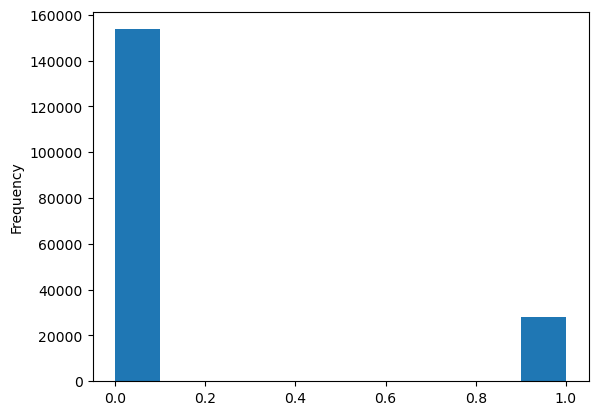

In [75]:
df['ismilitary'].plot(kind="hist")
print(df['ismilitary'].sample(5))

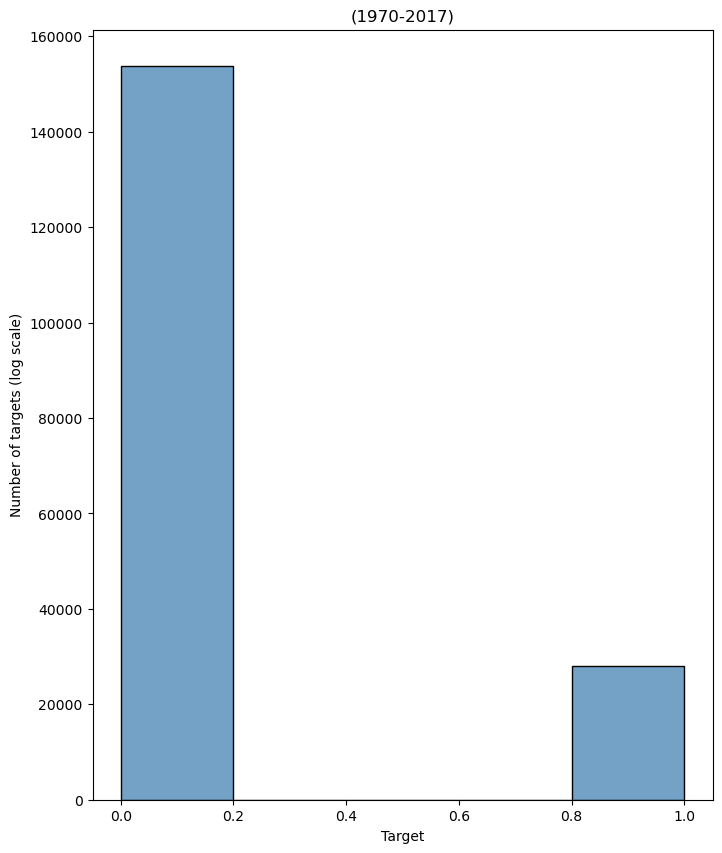

In [76]:
fig, ax = plt.subplots(figsize=(8,10))
sns.histplot(data = df, x = 'ismilitary', bins=5, color='steelblue')
plt.xlabel('Target')
plt.ylabel('Number of targets (log scale)')
plt.title('(1970-2017)')
plt.show()

<Axes: ylabel='Region'>

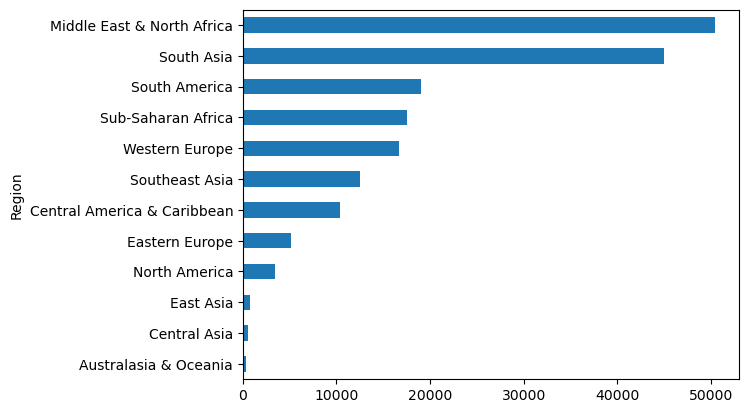

In [77]:
incidents_per_region = df.groupby('Region').size().sort_values()
incidents_per_region.plot(kind='barh')

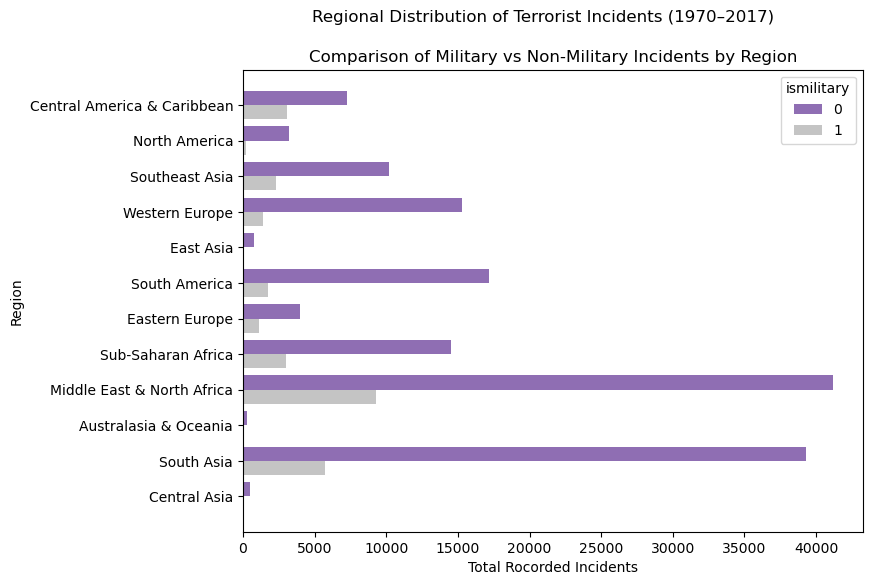

In [78]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.histplot(
    data=df,
    y='Region',
    hue= 'ismilitary',
    multiple='dodge', 
    palette= [ "#6A3D9A", "#B0B0B0"],
    shrink=0.8,
    linewidth = 0,
    edgecolor = "None",
    )
ax.set_title("Comparison of Military vs Non-Military Incidents by Region")
fig.suptitle("Regional Distribution of Terrorist Incidents (1970–2017)")
ax.set_xlabel("Total Rocorded Incidents")
ax.set_ylabel("Region")
plt.show()

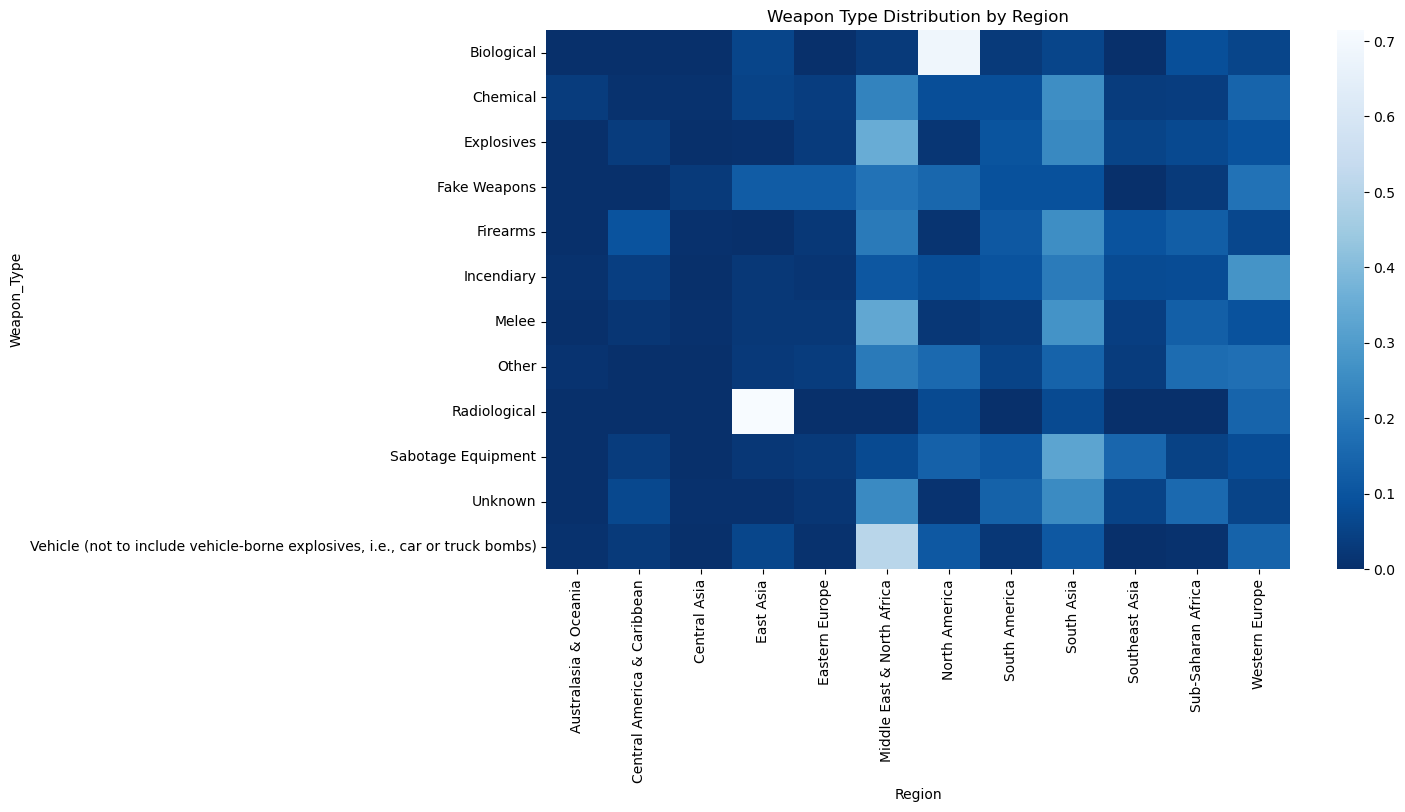

In [82]:
pivot = pd.crosstab(
    df["Weapon_Type"],
    df["Region"],
    normalize="index"
)

plt.figure(figsize=(12, 7))
sns.heatmap(
    pivot,
    cmap="Blues_r"
)
plt.title("Weapon Type Distribution by Region")
plt.show()


<Axes: ylabel='Frequency'>

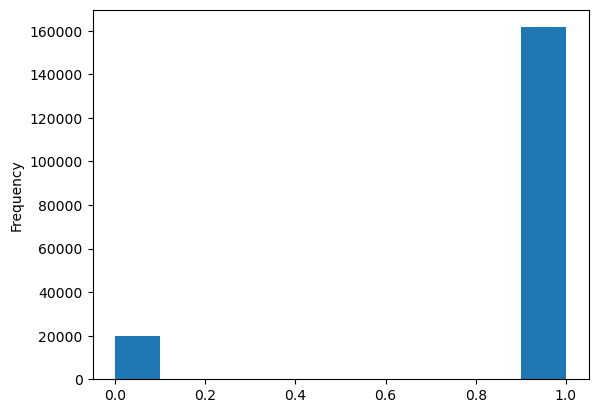

In [83]:
df['success'].plot(kind='hist')

In [85]:
# Copy dataframe
encoded_df = df.copy()

# Encode categorical columns
for col in ['Region', 'Attack_Type', 'Weapon_Type']:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col])

# Now correlation works
features_cols = ['Year', 'Month', 'Region', 'Attack_Type', 'Weapon_Type', 'ismilitary']
features_df = encoded_df[features_cols]
features_matrix = features_df.corr().round(2)
print(features_matrix)


             Year  Month  Region  Attack_Type  Weapon_Type  ismilitary
Year         1.00   0.00    0.05         0.06        -0.07        0.05
Month        0.00   1.00   -0.01         0.01         0.01        0.00
Region       0.05  -0.01    1.00         0.04         0.04       -0.10
Attack_Type  0.06   0.01    0.04         1.00         0.50       -0.06
Weapon_Type -0.07   0.01    0.04         0.50         1.00        0.02
ismilitary   0.05   0.00   -0.10        -0.06         0.02        1.00


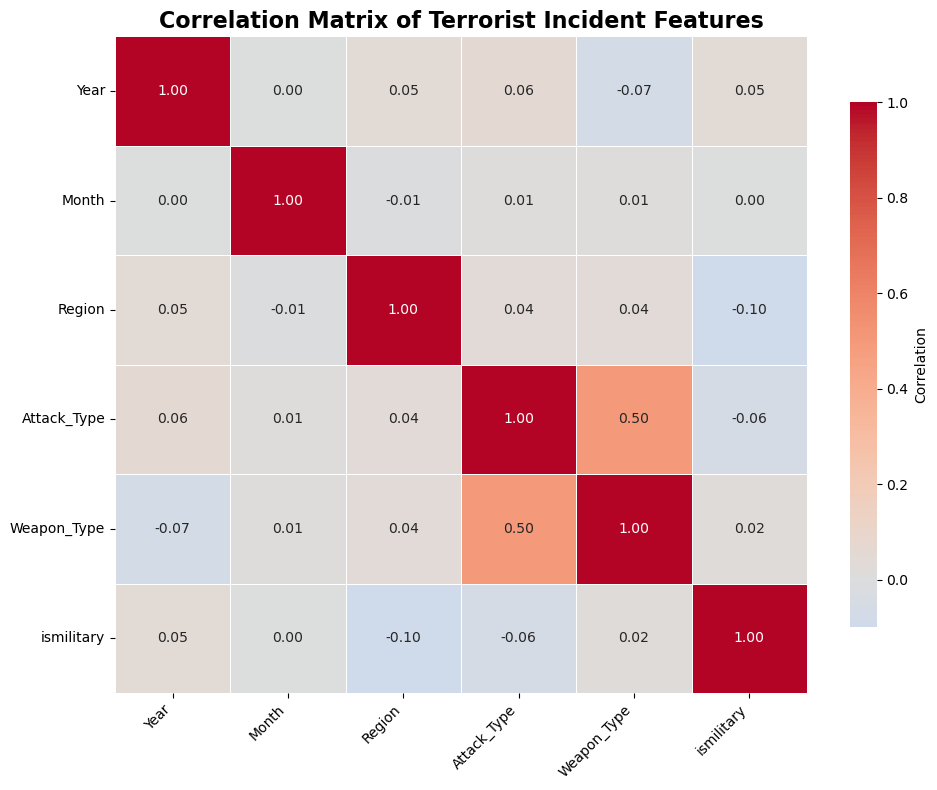

In [86]:

# ---- Step 3: Correlation matrix ----
corr_matrix = features_df.corr().round(2)

# ---- Step 4: Plot heatmap ----
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True,           # show correlation values
    fmt=".2f",            # 2 decimal places
    cmap="coolwarm",      # color map
    center=0,             # center colormap at 0
    linewidths=0.5,       # lines between cells
    cbar_kws={"shrink": 0.8, "label": "Correlation"}  # colorbar
)

plt.title("Correlation Matrix of Terrorist Incident Features", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Statify 
Success to Fail Attack: 9 to 1 unbalanced

Our target ['success'] holds unbalance distribution toward to 1 (attack went successful) than 0 (fail); 
hence, statify = y help with train/test set by giving more weight to class 0. 

Classification → use stratify=y (always safe).
Regression: Not recommended

In [87]:
# 3. Create X, y AFTER cleaning
X = df[['Year', 'Month', 'Country', 'Region', 'Attack_Type',
        'Weapon_Type', 'ismilitary', 'Nationality']]
y = df['success']

In [88]:
df[X.columns].sample(5)

,Year,Month,Country,Region,Attack_Type,Weapon_Type,ismilitary,Nationality
111763,2012,10,India,South Asia,Hostage Taking (Kidnapping),Firearms,0,India
79598,2006,1,Lesotho,Sub-Saharan Africa,Armed Assault,Firearms,0,Lesotho
177704,2017,8,Canada,North America,Facility/Infrastructure Attack,Incendiary,0,Canada
65651,1997,6,Philippines,Southeast Asia,Hostage Taking (Kidnapping),Unknown,0,Philippines
105022,2012,1,Nigeria,Sub-Saharan Africa,Facility/Infrastructure Attack,Incendiary,0,Nigeria


In [89]:
print(df[X.columns].isnull().sum())

Year              0
Month             0
Country           0
Region            0
Attack_Type       0
Weapon_Type       0
ismilitary        0
Nationality    1559
dtype: int64


In [90]:
y.value_counts()

success
1    161632
0     20059
Name: count, dtype: int64

### Building the ML model with pipeline
    MVP: Predict if a terrorist attack will succeed or not (binary). (Classification)

Format:
Preprocessor -> Model _> Saving Model

Note: Lingear Regression doesn't produce a good R2 score. 

### Logistic Regression

In [94]:
def pipeline_preprocessor():
    #1. Load Dataset
    df = pd.read_csv('../data/globalterrorismdb_0718dist.csv')
    df = df.copy()

    #2. Data Cleaning
    df = df.rename(columns={'iyear': 'Year', 'imonth': 'Month', 'country_txt': 'Country', 'region_txt': 'Region', 
                            'attacktype1_txt': 'Attack_Type', 'weaptype1_txt': 'Weapon_Type', 'natlty1_txt': 'Nationality'})
    
    # Mapping
    df['ismilitary'] = df['targtype1_txt'].apply(lambda x: 1 if x == 'Military' else 0)

    # 3. Selecting Features and Target
    X = df[['Year', 'Month', 'Country', 'Region', 'Attack_Type',
            'Weapon_Type', 'ismilitary', 'Nationality']]
    y = df['success']

    # 4. Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y)

    # 5. Identify numeric vs categorical columns
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()

    # 6. Transform pipelines
    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", MinMaxScaler())
        ])
    
    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy='constant', fill_value='Unknown')),  # fill missing first (Nationality)
        ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
        ])

    # 7. Column transformer
    preprocessor = ColumnTransformer(transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
        ])
    
    return preprocessor, X_train, X_test, y_train, y_test

preprocessor, X_train, X_test, y_train, y_test = pipeline_preprocessor()

C:\Users\hungh\AppData\Local\Temp\ipykernel_4084\3690624307.py:3: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/globalterrorismdb_0718dist.csv')


In [95]:
def fit_log_reg(preprocessor, X_train, X_test, y_train, y_test):
    log_reg_model = Pipeline([
        ('preprocess', preprocessor),
        ('model', LogisticRegression(solver='saga'))
        ])

    # 9. Fit model
    log_reg_model.fit(X_train, y_train)
    log_score = log_reg_model.score(X_test, y_test)
    y_pred_lr = log_reg_model.predict(X_test)

    print(f"Logisitic Regression Score: {log_score:.4f}")
    print(f"Logisitic Regression Accurary: {log_score *100:.2f}")
    return log_reg_model, log_score, y_pred_lr

log_reg_model, log_score, y_pred_lr = fit_log_reg(preprocessor, X_train, X_test, y_train, y_test)

Logisitic Regression Score: 0.8929
Logisitic Regression Accurary: 89.29


In [96]:
def get_log_reg_coeff(log_reg_model, log_score):
    # Get feature names from preprocessor
    feature_names = log_reg_model.named_steps["preprocess"].get_feature_names_out()

    # Clean feature names: remove "num__" and "cat__"
    clean_feature_names = [name.split("__", 1)[1] for name in feature_names]

    # Extract coefficients from the logistic regression model inside the pipeline
    coefficients = log_reg_model.named_steps["model"].coef_[0]

    # Combine into a DataFrame
    coef_df = pd.DataFrame({
        "Feature": clean_feature_names,
        "Coefficient": coefficients
    }).sort_values("Coefficient", ascending=False)

    print("\n--- Logistic Regression Coefficients ---")
    print(coef_df.head(15))
    return coef_df

log_reg_coeff = get_log_reg_coeff(log_reg_model, log_score)


--- Logistic Regression Coefficients ---
                                               Feature  Coefficient
222    Attack_Type_Hostage Taking (Barricade Incident)     1.985414
364                                Nationality_Myanmar     1.240772
177                                 Country_Tajikistan     1.212570
332                                  Nationality_Kenya     1.174275
232                                  Weapon_Type_Melee     1.116018
266                               Nationality_Cambodia     1.110904
175                                      Country_Syria     1.108198
230                               Weapon_Type_Firearms     1.095364
237  Weapon_Type_Vehicle (not to include vehicle-bo...     1.057798
315                               Nationality_Honduras     1.037592
129                                  Country_Nicaragua     1.015023
140                                       Country_Peru     0.976890
223            Attack_Type_Hostage Taking (Kidnapping)     0.965564
40    

In [97]:
# Save the model to a file
lg_metadata = {
    "model_name": "lg_terrorist_success_rate",
    "trained_date": "2025-12-12",
    "training_data_description": (
        "Predicting a terrorist attack's success rate based on "
        "Year, Month, Country, Region, Attack_Type, Weapon_Type, "
        "ismilitary, and Nationality"
    ),
    "accuracy": 0.89,
    "author": "Hung Nguyen"
}

# Save the model and metadata to a file
joblib.dump({'model': log_reg_model, 'metadata': lg_metadata}, '../model/lg_terrorist_success_rate.joblib')
print("Logisitic Regression saved successfully with metadata.")

Logisitic Regression saved successfully with metadata.


### Random Forrest Classification

In [98]:
def fit_rfc_model(preprocessor, X_train, X_test, y_train, y_test):
    rfc_model = Pipeline([
        ('preprocess', preprocessor),
        ('model', RandomForestClassifier())
        ])

    # 9. Fit model
    rfc_model.fit(X_train, y_train)
    rfc_score = rfc_model.score(X_test, y_test)
    y_pred_rfc = rfc_model.predict(X_test)

    print(f"Random Forest Classification R^2 Score: {rfc_score:.4f}")
    print(f"Random Forest Classification Accurary: {rfc_score *100:.2f}")
    return rfc_model, rfc_score, y_pred_rfc

rfc_model, rfc_score, y_pred_rfc = fit_rfc_model(preprocessor, X_train, X_test, y_train, y_test)

Random Forest Classification R^2 Score: 0.8918
Random Forest Classification Accurary: 89.18


In [99]:
def get_rfc_feat(rfc_model, rfc_score):
    feature = rfc_model.named_steps["preprocess"].get_feature_names_out()
    # Clean names (optional)
    clean_names = [name.split("__", 1)[1] for name in feature]

    # 3. Get feature importances from the RandomForest model
    importances = rfc_model.named_steps["model"].feature_importances_

    # 4. Build a DataFrame
    rfc_importance_df = pd.DataFrame({
        "Feature": clean_names,
        "Importance": importances}).sort_values("Importance", ascending=False)

    print("Random Forrest Classification Coefficients")
    print(rfc_importance_df.head(10))
    return rfc_importance_df


rfc_coeff = get_rfc_feat(rfc_model, rfc_score)


Random Forrest Classification Coefficients
                                     Feature  Importance
0                                       Year    0.330528
1                                      Month    0.272673
218                Attack_Type_Assassination    0.047585
2                                 ismilitary    0.025256
228                   Weapon_Type_Explosives    0.024587
219            Attack_Type_Bombing/Explosion    0.017028
230                     Weapon_Type_Firearms    0.015617
217                Attack_Type_Armed Assault    0.012865
435                      Nationality_Unknown    0.011858
223  Attack_Type_Hostage Taking (Kidnapping)    0.008955


In [100]:
# Save the model to a file
rfc_metadata = {
    "model_name": "rfc_terrorist_success_rate",
    "trained_date": "2025-12-12",
    "training_data_description": (
        "Predicting a terrorist attack's success rate based on "
        "Year, Month, Country, Region, Attack_Type, Weapon_Type, "
        "ismilitary, and Nationality"
    ),
    "accuracy": 0.89,
    "author": "Hung Nguyen"
}

# Save the model and metadata to a file
joblib.dump({'model': rfc_model, 'metadata': rfc_metadata}, '../model/rfc_terrorist_success_rate.joblib')
print("Random Forest model saved successfully with metadata.")

Random Forest model saved successfully with metadata.


In [101]:
pd.DataFrame(
    rfc_model.named_steps['preprocess'].transform(X_train)
)

,0,1,2,3,4,5,6,7,8,9,...,440,441,442,443,444,445,446,447,448,449
0,0.936170,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.914894,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.255319,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.851064,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.680851,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145347,0.765957,0.583333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145348,0.914894,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145349,0.446809,0.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145350,1.000000,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Note: Grid Search

    4th - 45 mins
    5th - 73m
    6th without SMOTE - 30 min

In [51]:
def create_rfc_pipeline(preprocessor):
    """
    Returns an unfitted Random Forest pipeline with preprocessing.
    """
    rfc_pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('model', RandomForestClassifier(random_state=42))
    ])

    param_grid = {
    "model__n_estimators": [50, 100],
    "model__max_depth": [10, None],
    "model__max_features": ["sqrt", "log2", 0.8],
    "model__min_samples_split": [2, 5, 10],
    }
    return rfc_pipeline, param_grid

rfc_pipeline, param_grid = create_rfc_pipeline(preprocessor)

In [52]:
def fit_rfc_gridsearch(rfc_pipeline, X_train, y_train, X_test, y_test, param_grid, cv_splits=5, scoring="precision"):
    """Perform GridSearchCV on a Random Forest pipeline and return the best model and test score"""

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    grid_search = GridSearchCV(
    estimator=rfc_pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring= scoring,
    n_jobs=-1,
    verbose=2)

    # Fit
    grid_search.fit(X_train, y_train)

    # Best model and predictions
    best_model = grid_search.best_estimator_
    y_pred_best = best_model.predict(X_test)
    best_model = grid_search.best_estimator_
    test_score = best_model.score(X_test, y_test)

    # Results
    print("Best params:", grid_search.best_params_)
    print("Best CV score:", grid_search.best_score_)
    print("Test Accuracy:", test_score)

    return best_model, test_score, y_pred_best

best_model, test_score, y_pred_best = fit_rfc_gridsearch(rfc_pipeline, X_train, y_train, X_test, y_test, param_grid, cv_splits=5, scoring="precision")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best params: {'model__max_depth': None, 'model__max_features': 0.8, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Best CV score: 0.9119314674067788
Test Accuracy: 0.8913013566691433


In [55]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.26      0.35      4012
           1       0.91      0.97      0.94     32327

    accuracy                           0.89     36339
   macro avg       0.71      0.62      0.64     36339
weighted avg       0.87      0.89      0.88     36339



In [102]:
# Save the model to a file
best_model_metadata = {
    "model_name": "best_model_terrorist_success_rate",
    "trained_date": "2025-12-12",
    "training_data_description": (
        "Hyperparameter tuning RFC's model to focus on precision"
    ),
    "accuracy": 0.89,
    "author": "Hung Nguyen"
}

# Save the model and metadata to a file
joblib.dump({'model': best_model, 'metadata': best_model_metadata}, '../model/bm_terrorist_success_rate.joblib')
print("Best Model saved successfully with metadata.")

NameError: name 'best_model' is not defined

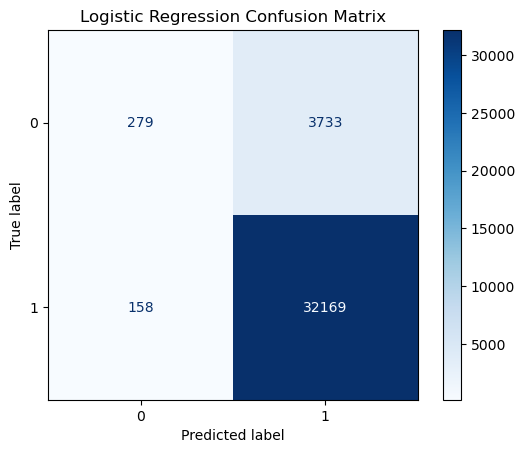

In [110]:
# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr).astype(int)  # convert to int
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=[0, 1])
disp_lr.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression Confusion Matrix")
plt.show()


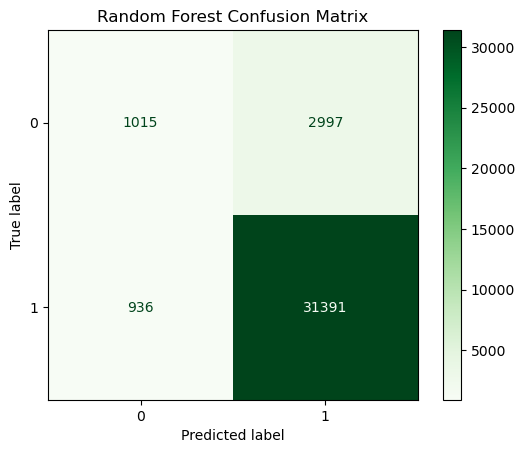

In [111]:
# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rfc).astype(int)  # convert to int
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[0, 1])
disp_rf.plot(cmap=plt.cm.Greens)
plt.title("Random Forest Confusion Matrix")
plt.show()
